In [8]:
import os.path
import numpy as np
import matplotlib.pyplot as plt
import scipy
import refnx #https://refnx.readthedocs.io/en/latest/installation.html
from refnx.dataset import ReflectDataset, Data1D
from refnx.analysis import Transform, CurveFitter, Objective, Model, Parameter
from refnx.reflect import SLD, Slab, ReflectModel
import time
import mpld3 #you may need to pip install mpld3 to get this working - it allows zoom action on inline plots
import seaborn as sns
#pth = r'/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/XRay/XRR/'
path = os.getcwd()

pth = '../Data/'
%load_ext autoreload
%autoreload 2
import matplotlib as mpl
%matplotlib widget
import glob 
import ana_xrr
colors = ['#4053d3', '#b51d14', '#ddb310','#348f42','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(colors)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load all the files in 

In [2]:
flist_lv = glob.glob('lv*.txt', root_dir=pth)
flist_lv.sort()
print(flist_lv)

labs_lv = ['67 nm Al', '30 nm Al/AlOx/37 nm Al', 'Slow 50 nm Al/5x AlOx/20 nm Al', 'Fast 50 nm Al/5x AlOx/20 nm Al','80 nm Ta/8 nm Al/AlOx/50 nm Al','80 nm Ta/8 nm Al/AlOx/50 nm Al','80 nm Ta/8 nm Al/AlOx/50 nm Al redo','80 nm Ta/AlOx/150 nm Ta']
flist_stan = glob.glob('su*.txt', root_dir=pth)
flist_stan.sort()
print(flist_stan)
labs_stan = ['80 Nb/8 Al/AlOx/50 Al 9 T Static','80 Nb/8 Al/AlOx/50 Al 9 T Static Redo','80 Nb/8 Al/AlOx/3 Al/80 nm Nb 9 T Static','80 Nb/8 Al/AlOx/50 Al 1 T Static','80 Nb/8 Al/AlOx/50 Al 6 T Dynamic']

flist = flist_lv + flist_stan
labs = labs_lv + labs_stan

['lv1_XRR_1_scan1.txt', 'lv2_XRR_1_scan1.txt', 'lv3_XRR_1_scan1.txt', 'lv4_XRR_1_scan1.txt', 'lv5_XRR_1_scan1.txt', 'lv6_XRR_1_redo_scan1.txt', 'lv6_XRR_1_scan1.txt', 'lv7_XRR_1_scan1.txt']
['su01_XRR_1_remeas_scan1.txt', 'su01_XRR_3_scan1.txt', 'su02_XRR_1_scan1.txt', 'su03_XRR_1_scan1.txt', 'su04_XRR_1_scan1.txt', 'su05_XRR_1_scan1.txt', 'su06_XRR_1_scan1.txt', 'su07_XRR_1_scan1.txt', 'su08_XRR_1_scan1.txt']


## Fit the Al layer

In [26]:
qrng = [0.036, 0.6]
obj1, par1 = ana_xrr.sim_al(pth+flist[0], level='al', qrng=qrng, plot=False)
obj2, par2 = ana_xrr.sim_al(pth+flist[0], level='alox/al', qrng=qrng, plot=False)
obj3, par3 = ana_xrr.sim_al(pth+flist[0], level='alox/al/alox', qrng=qrng, plot=False)

print(par1)
print(par2)
print(par3)

6.15271379980123: : 49it [00:01, 46.51it/s]  
4.947428677154854: : 164it [00:05, 30.82it/s] 
1.1225148217238707: : 344it [00:16, 20.41it/s]

{'thk': [500.10765867402495, inf], 'rough': [0.6242784721713305, 9.080274911638929], 'sld': [21.107380233452385, 33.319], 'layers': ['Al', 'Substrate'], 'chisq': 12.290238868129517}
{'thk': [16.98638639693945, 481.7309733462719, inf], 'rough': [4.9206598734358983e-05, 0.1754220347776566, 9.03425268651163], 'sld': [20.44773983249825, 22.060124568518873, 33.319], 'layers': ['AlOx_top', 'Al', 'Substrate'], 'chisq': 9.866258951788872}
{'thk': [7.722881138752836, 496.6122750167187, 2.232779512288316, inf], 'rough': [1.6655698795625227, 0.16993527448502604, 8.861815196814423, 5.377604044173013], 'sld': [26.31384029907645, 19.318014207562793, 37.02142525983971, 33.319], 'layers': ['AlOx_top', 'Al', 'AlOx_bot', 'Substrate'], 'chisq': 2.2390365997417128}


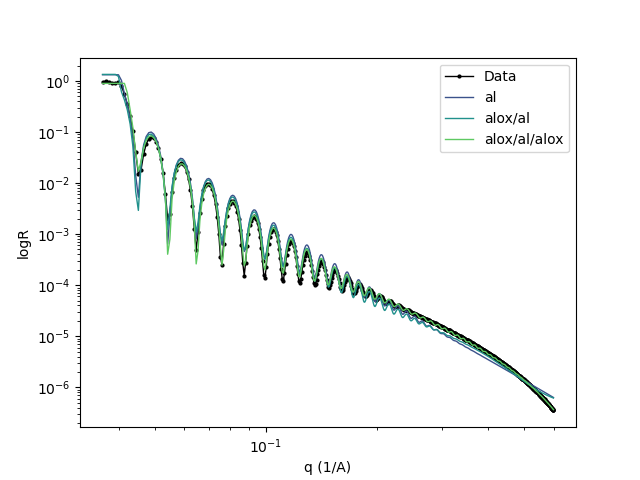

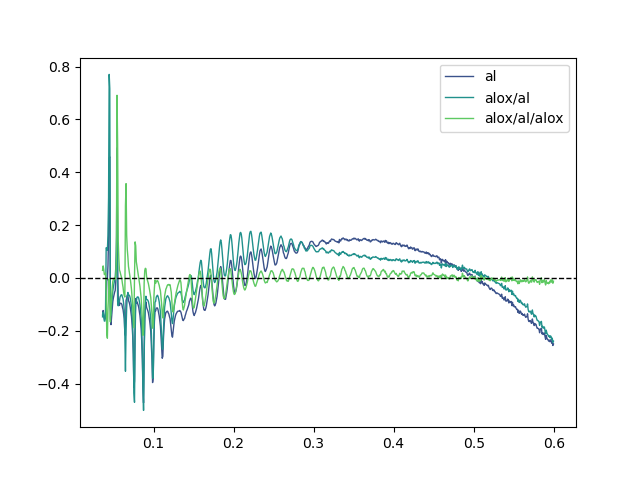

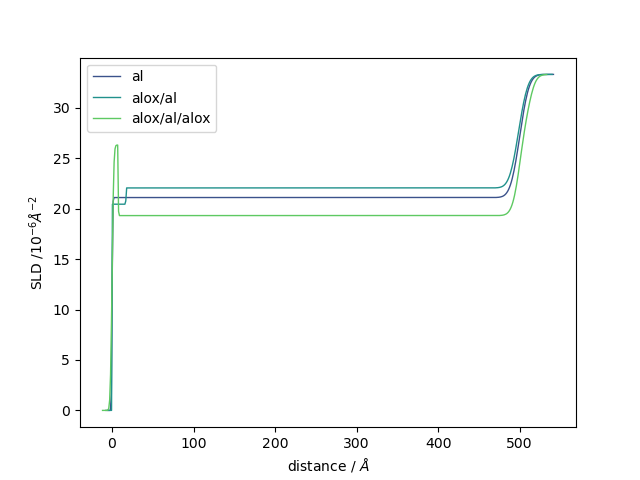

In [34]:
sns.set_palette('viridis',3)


mpl.rcParams['lines.linewidth'] = 1
ana_xrr.plot_obj([obj1, obj2,obj3],['al','alox/al', 'alox/al/alox'])

In [19]:
qrng = [0.037, 0.6]
obj1, par1 = ana_xrr.sim_al(pth+flist[1], level='al/alox/al', qrng=qrng,cfg_in={'al':{'rough':2,'thk':250}}, plot=False)
obj2 , par2  = ana_xrr.sim_al(pth+flist[1], level='alox/al/alox/al', qrng=qrng,cfg_in={'al':{'rough':2,'thk':250}}, plot=False)
obj3 , par3  = ana_xrr.sim_al(pth+flist[1], level='alox/al/alox/al/alox', qrng=qrng,cfg_in={'al':{'rough':2,'thk':250}}, plot=False)
obj4, par4  = ana_xrr.sim_al(pth+flist[1], level='alox/al/buff/alox/buff/al/alox', qrng=qrng,cfg_in={'al':{'rough':2,'thk':250}}, plot=False)

13.758035631459183: : 75it [00:02, 27.75it/s]


0.5593989463419113: : 398it [00:21, 18.11it/s]


2.149622138841525: : 603it [00:41, 14.69it/s] 


7.905580967141475: : 415it [00:42,  9.81it/s]

In [283]:
pp = {'sld':{}, 'thick':{}, 'rough':{},'chisq':[]} 
pars = [par1, par2, par3, par4]
layer_list = par4['layers']

for l in layer_list:
    indices = [i for i, layer in enumerate(layer_list) if layer == l]  
    for i, index in enumerate(indices):
        if i>0: l = l + str(i)
        pp['rough'][l]=[]
        pp['thick'][l]=[]
        pp['sld'][l]=[]

for p in pars:
    pp['chisq'].append(p['chisq'])
    for l in set(layer_list): 
        if l in p['layers']:
            #index = p['layers'].index(l)
            indices = [i for i, layer in enumerate(p['layers']) if layer == l]
            for i, index in enumerate(indices):
                if i>0: l = l + str(i)
                pp['rough'][l].append(p['rough'][index])
                pp['thick'][l].append( p['thk'][index])
                pp['sld'][l].append(p['sld'][index])
            #p['thick'][index]
        #p['sld'][index]

#par1['sld'][index]

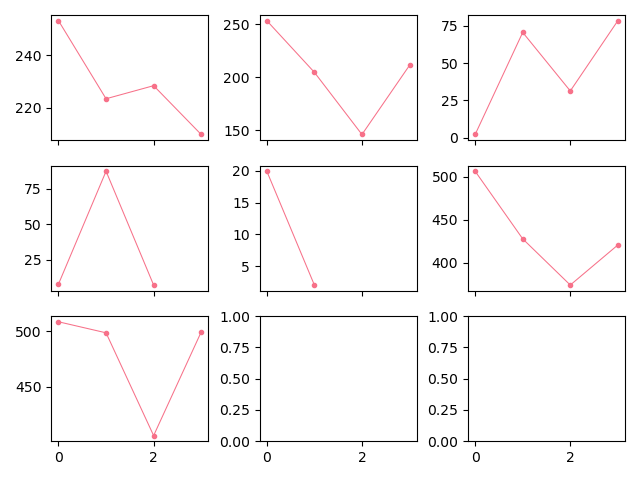

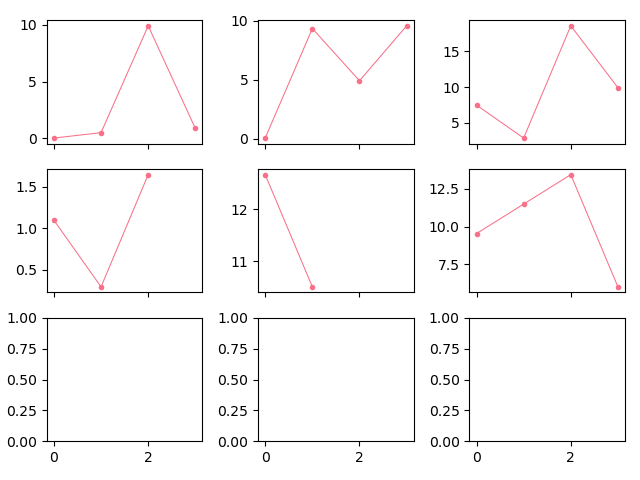

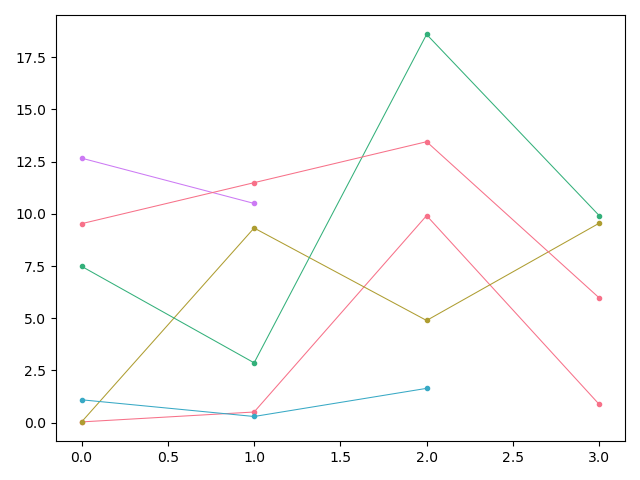

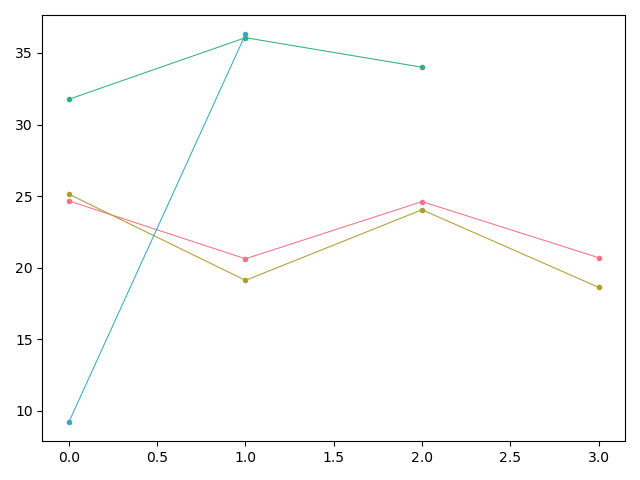

In [299]:
pp['rough']['Al'][0::2]

pp['rough']['Al'][1::2]

pp

fig, ax = plt.subplots(3,3, sharex=True) 
ax = ax.flatten()

ax[0].plot(pp['thick']['Al'],'.-')
ax[1].plot(pp['thick']['Al1'],'.-')
ax[2].plot(pp['thick']['AlOx_JJ'],'.-')
ax[3].plot(pp['thick']['AlOx_top'],'.-')
ax[4].plot(pp['thick']['AlOx_bot'],'.-')
ax[5].plot(np.array(pp['thick']['Al'])+np.array(pp['thick']['Al1']),'.-')
ax[6].plot(np.array(pp['thick']['Al'])+np.array(pp['thick']['Al1'])+np.array(pp['thick']['AlOx_JJ']),'.-')
fig.tight_layout()

fig, ax = plt.subplots(3,3, sharex=True) 
ax = ax.flatten()

ax[0].plot(pp['rough']['Al'],'.-')
ax[1].plot(pp['rough']['Al1'],'.-')
ax[2].plot(pp['rough']['AlOx_JJ'],'.-')
ax[3].plot(pp['rough']['AlOx_top'],'.-')
ax[4].plot(pp['rough']['AlOx_bot'],'.-')
ax[5].plot(pp['rough']['Substrate'],'.-')

fig.tight_layout()


fig, ax = plt.subplots(sharex=True) 

ax.plot(pp['rough']['Al'],'.-')
ax.plot(pp['rough']['Al1'],'.-')
ax.plot(pp['rough']['AlOx_JJ'],'.-')
ax.plot(pp['rough']['AlOx_top'],'.-')
ax.plot(pp['rough']['AlOx_bot'],'.-')
ax.plot(pp['rough']['Substrate'],'.-')

fig.tight_layout()


fig, ax = plt.subplots(1,1, sharex=True) 

ax.plot(pp['sld']['Al'],'.-')
ax.plot(pp['sld']['AlOx_JJ'],'.-')
ax.plot(pp['sld']['AlOx_top'],'.-')
ax.plot(pp['sld']['AlOx_bot'],'.-')

fig.tight_layout()


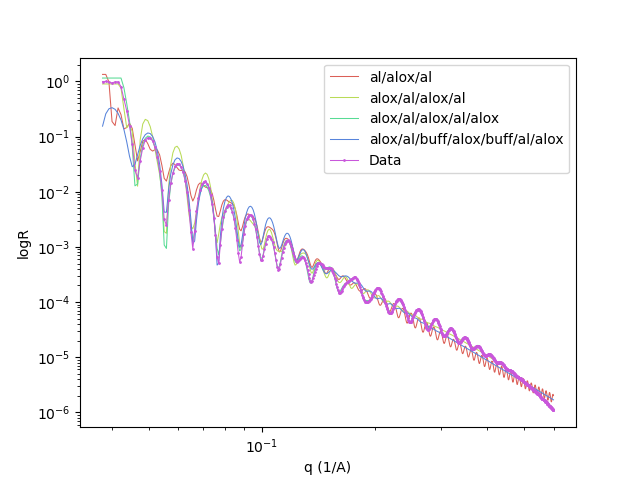

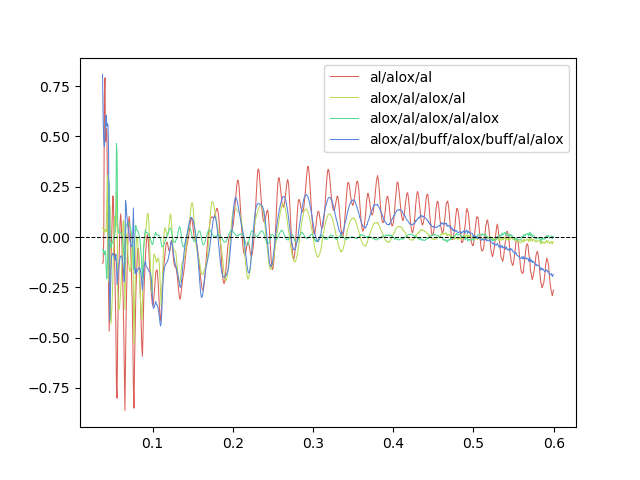

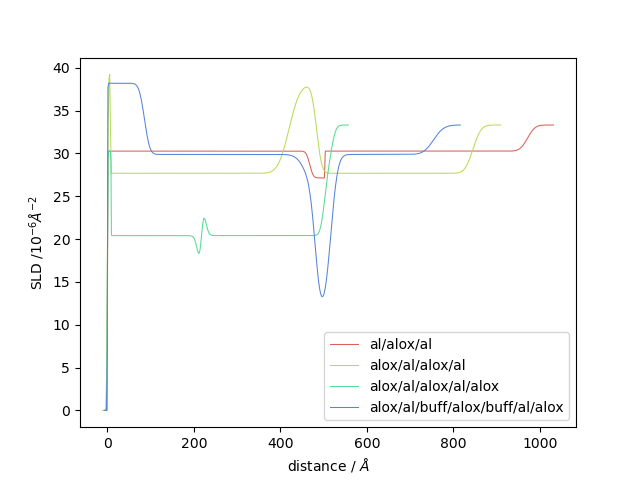

In [133]:
sns.set_palette('hls',5)
mpl.rcParams['lines.linewidth'] = 0.75
ana_xrr.plot_obj([obj1, obj2,obj3,obj4],['al/alox/al','alox/al/alox/al', 'alox/al/alox/al/alox','alox/al/buff/alox/buff/al/alox'], [struct1,struct2,struct3,struct4])

## Fit the al/Nb bilayer

In [16]:
qrng = [0.05, 0.5]
obj1, struct1, pars1 = ana_xrr.sim_al(pth+flist[13], level='al/nb', qrng=qrng,cfg_in={'al':{'rough':1,'thk':80}, 'nb':{'rough':6,'thk':570}}, plot=False)
obj2, struct2, pars2 = ana_xrr.sim_al(pth+flist[13], level='ox/al/nb', qrng=qrng,cfg_in={'al':{'rough':1,'thk':80}, 'nb':{'rough':6,'thk':570}}, plot=False)
obj3, struct3, pars3 = ana_xrr.sim_al(pth+flist[13], level='ox/al/nb/ox', qrng=qrng,cfg_in={'al':{'rough':1,'thk':80}, 'nb':{'rough':6,'thk':570}}, plot=False)
obj4, struct4, pars4 = ana_xrr.sim_al(pth+flist[13], level='ox/al/buff/nb/ox', qrng=qrng,cfg_in={'al':{'rough':1,'thk':80}, 'nb':{'rough':6,'thk':570}}, plot=False)
obj5, struct5, pars5 = ana_xrr.sim_al(pth+flist[13], level='ox/al/buff/nb/ox/buff', qrng=qrng,cfg_in={'al':{'rough':1,'thk':80}, 'nb':{'rough':6,'thk':570}}, plot=False)


13.293369043321661: : 79it [00:02, 30.57it/s]


12.415334961280099: : 119it [00:05, 20.60it/s]


10.144293768409074: : 177it [00:13, 12.72it/s]


9.924020956306869: : 187it [00:15, 12.41it/s] 
15.025826954724169: : 240it [00:21, 11.23it/s]


1.3685816449042538: : 667it [00:41, 16.20it/s]


2.7361931599582756


1.380726324996957: : 612it [00:39, 15.63it/s] 


2.755975844624654


1.8890892853029304: : 618it [00:35, 17.17it/s]


3.7560698497740646


1.37207536358419: : 434it [00:26, 16.46it/s]  


2.7369506957103606


1.3893147702360515: : 966it [00:56, 17.00it/s]


2.7757520015928323


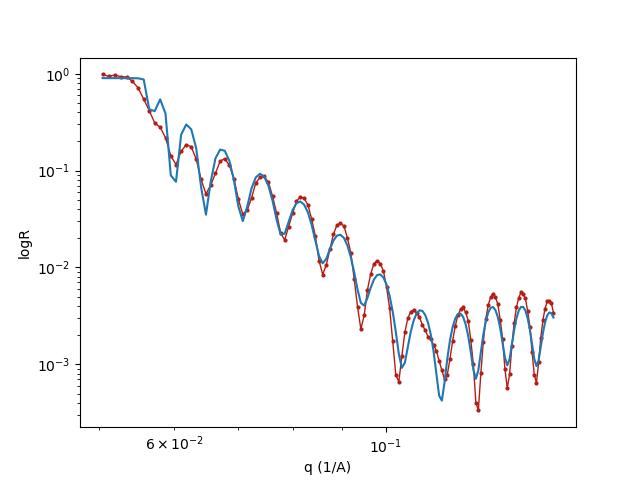

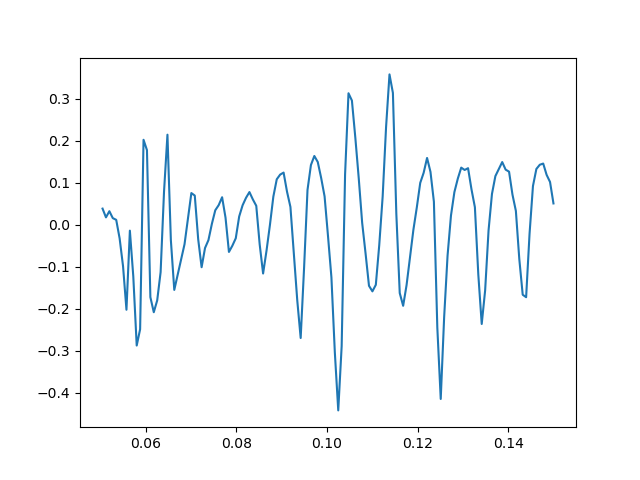

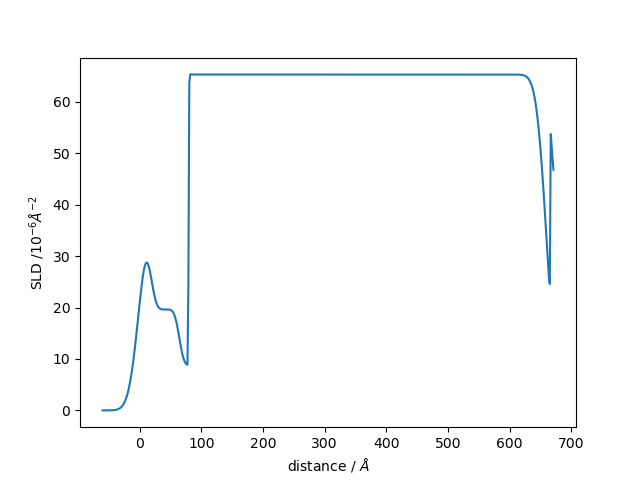

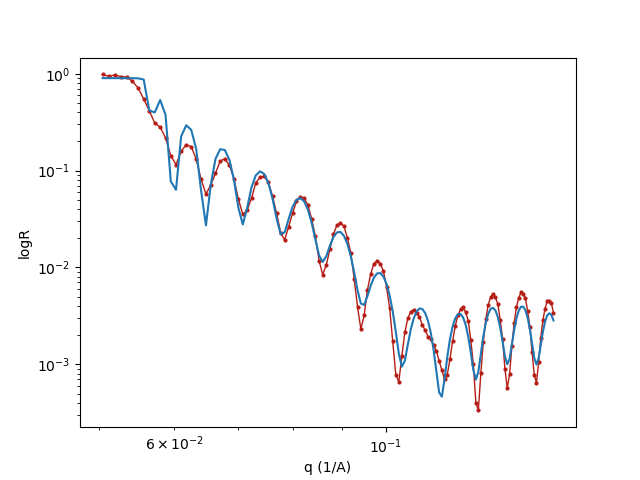

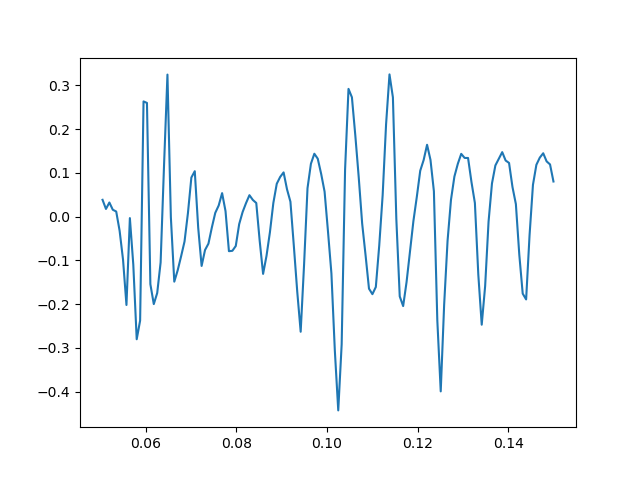

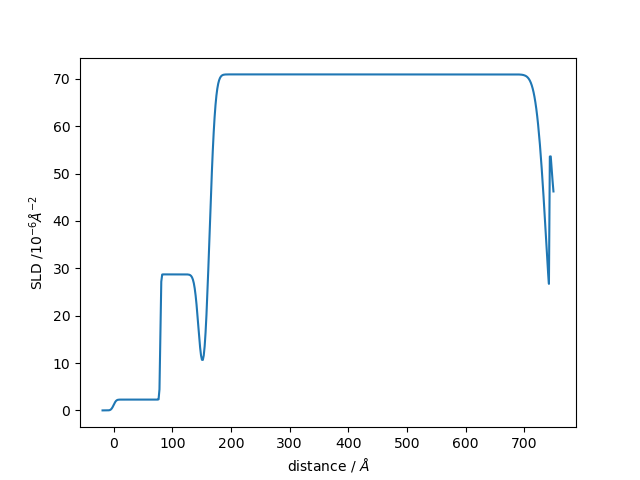

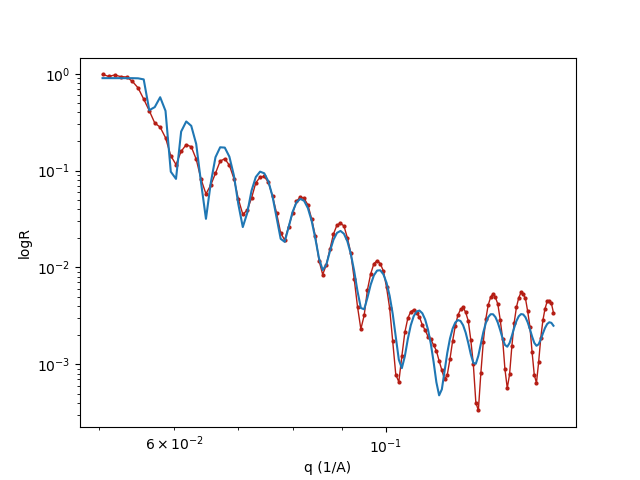

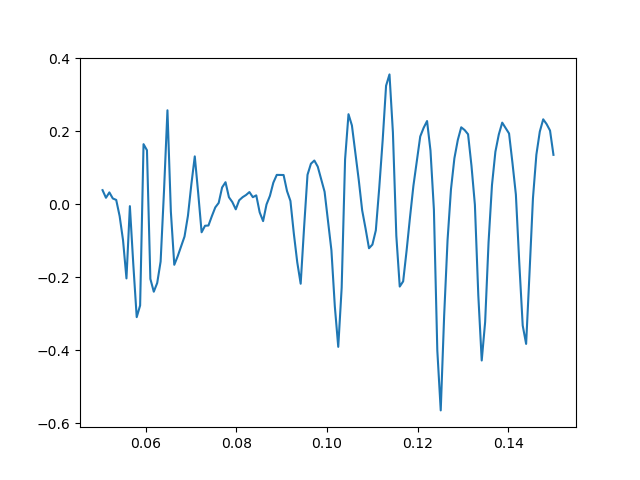

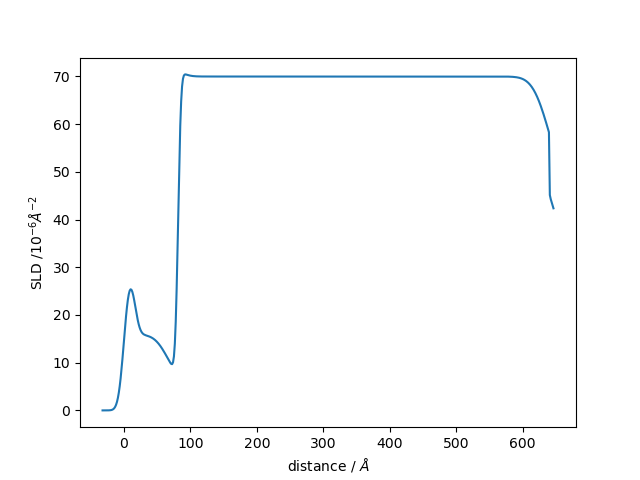

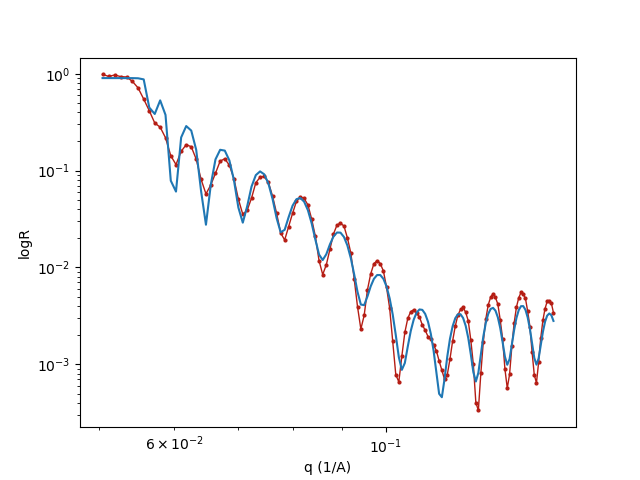

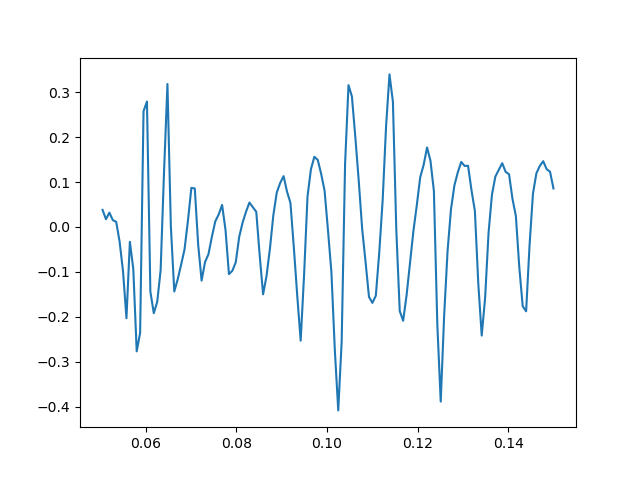

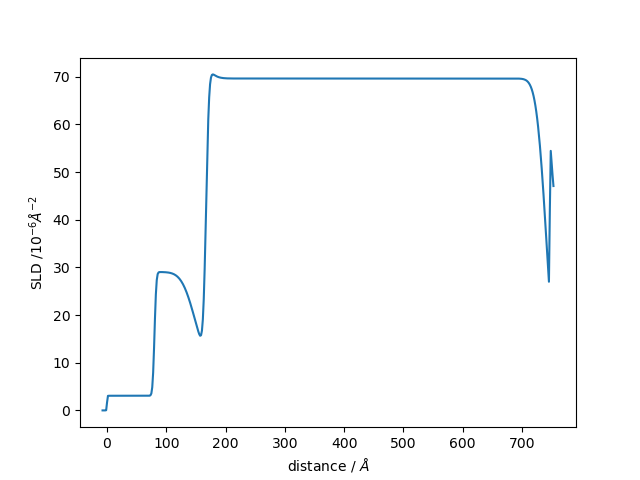

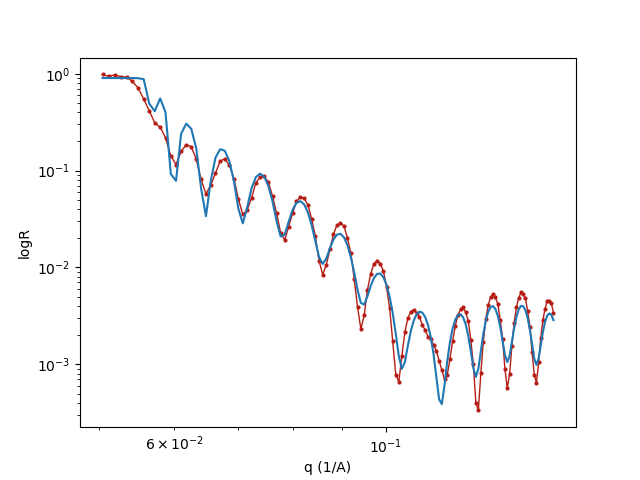

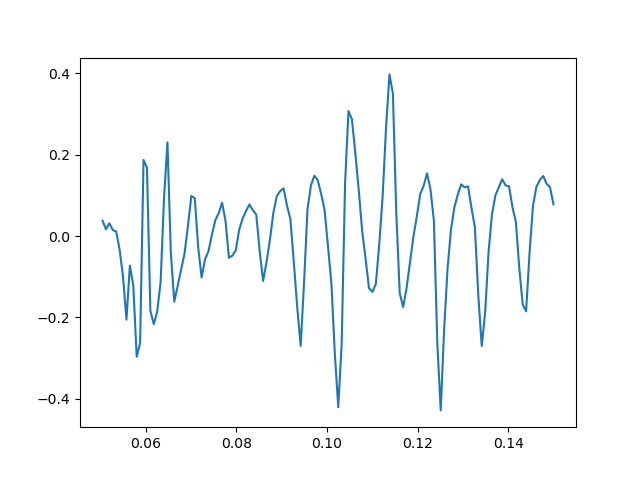

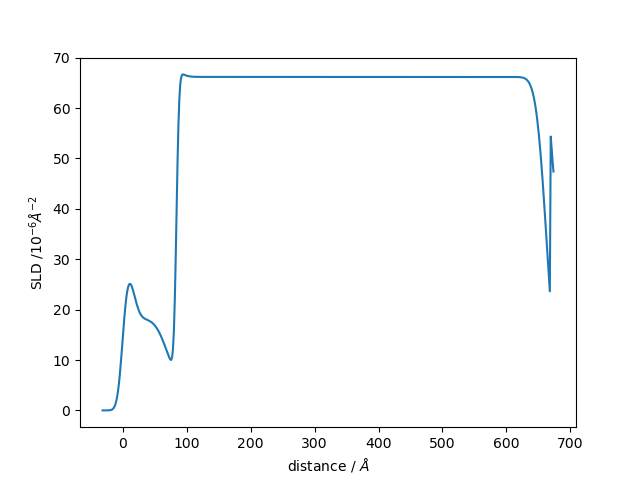

In [10]:
for i in range(5):
    obj0, struct4, pars4 = ana_xrr.sim_al(pth+flist[13], level='ox/al/buff/nb/ox', qrng=[0.05,0.15],cfg_in={'al':{'rough':1,'thk':80}, 'nb':{'rough':6,'thk':570}}, plot=True, SLD_rng=1.5)
    #print(obj0.chisqr())

________________________________________________________________________________
Objective - 6333506320
Dataset = <None>, 133 points
datapoints = 133
chi2 = 2.7435238933686987
Weighted = False
Transform = Transform('logY')
________________________________________________________________________________
________________________________________________________________________________
<Parameter:    'scale'    , value=0.900157 +/- 0.105, bounds=[0.9, 1.2]>
<Parameter:     'bkg'     , value=5e-07 +/- 0.00101, bounds=[1e-09, 5e-07]>
<Parameter:'dq - resolution', value=0.05  (fixed) , bounds=[0.001, 0.1]>
<Parameter:  'q_offset'   , value=0.00325207 +/- 0.0096, bounds=[-0.025, 0.025]>
________________________________________________________________________________
________________________________________________________________________________
<Parameter: 'Air - thick' , value=inf  (fixed) , bounds=[-inf, inf]>
________________________________________________________________________________


1.3616060742835288: : 687it [02:35,  4.41it/s]


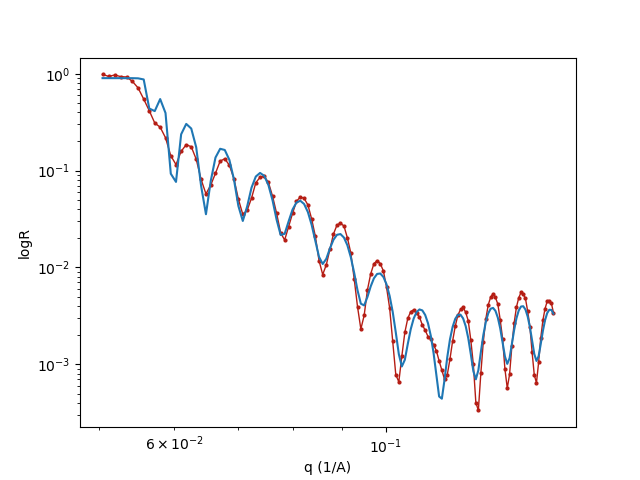

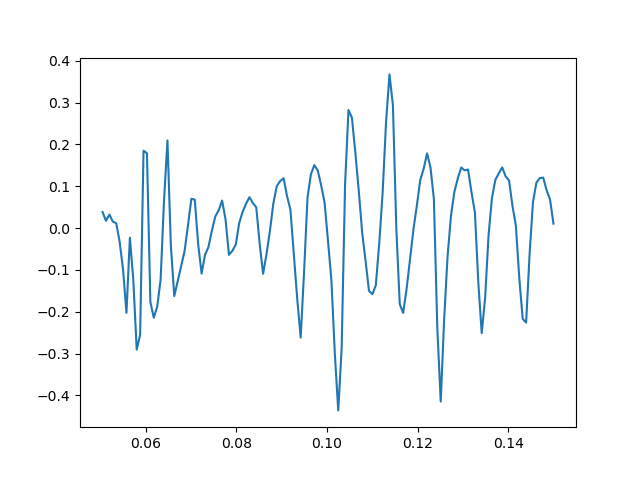

In [21]:
obj,pars2 = ana_xrr.refit(obj, pth+flist[13], qrng=[0.05, 0.15])

In [20]:
print(obj)


________________________________________________________________________________
Objective - 6333506320
Dataset = <None>, 133 points
datapoints = 133
chi2 = 2.7435238933686987
Weighted = False
Transform = Transform('logY')
________________________________________________________________________________
________________________________________________________________________________
<Parameter:    'scale'    , value=0.900157 +/- 0.105, bounds=[0.9, 1.2]>
<Parameter:     'bkg'     , value=5e-07 +/- 0.00101, bounds=[1e-09, 5e-07]>
<Parameter:'dq - resolution', value=0.05  (fixed) , bounds=[0.001, 0.1]>
<Parameter:  'q_offset'   , value=0.00325207 +/- 0.0096, bounds=[-0.025, 0.025]>
________________________________________________________________________________
________________________________________________________________________________
<Parameter: 'Air - thick' , value=inf  (fixed) , bounds=[-inf, inf]>
________________________________________________________________________________


In [18]:
obj.nll()

1.3748906279002286

1.3776404309018524: : 497it [00:50,  9.83it/s]


2.7467000656075733


1.8793209459822955: : 332it [00:37,  8.88it/s]


3.7574544324425734


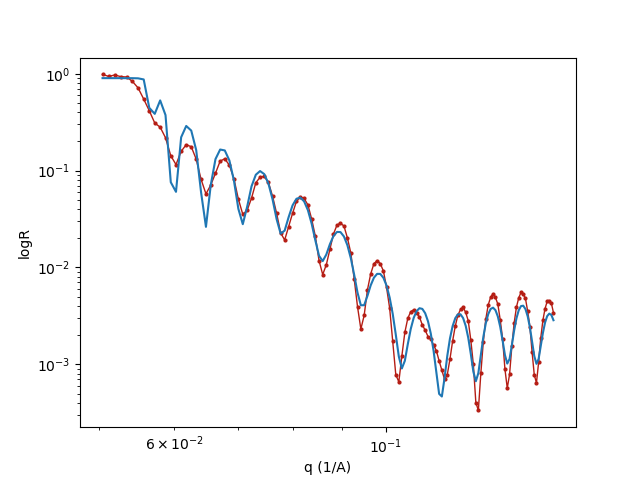

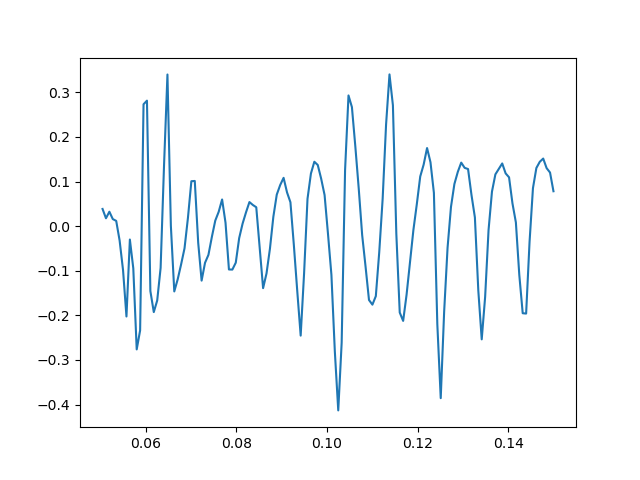

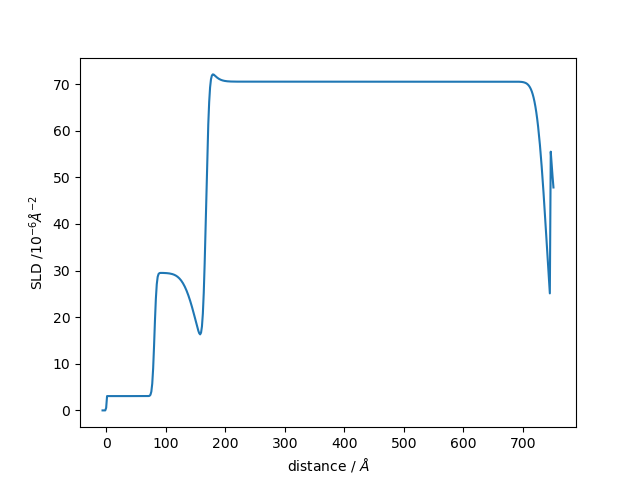

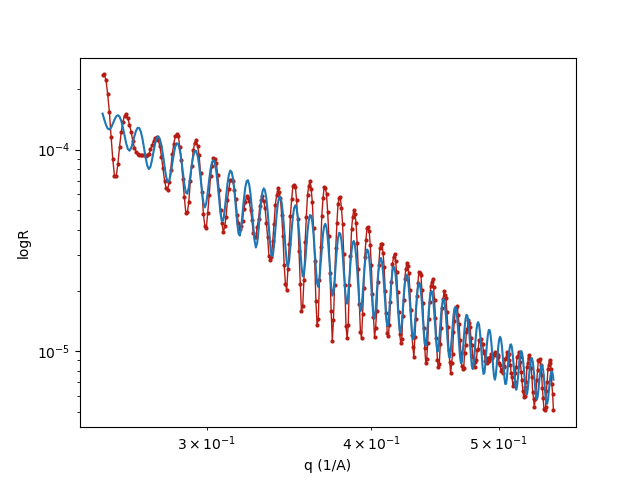

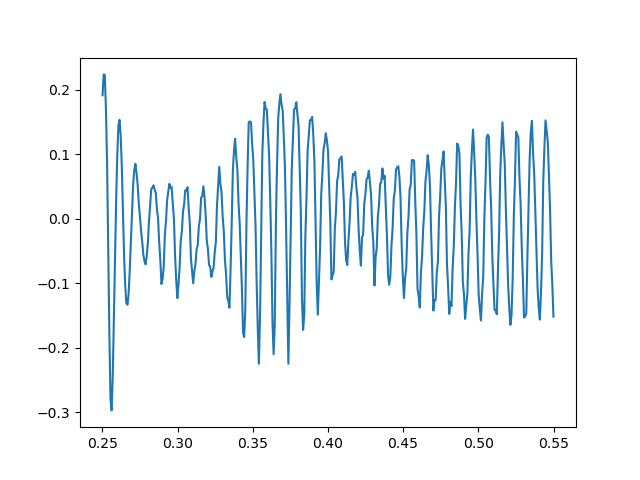

In [22]:
obj0, struct4, pars4 = ana_xrr.sim_al(pth+flist[13], level='ox/al/buff/nb/ox', qrng=[0.05,0.15],cfg_in={'al':{'rough':1,'thk':80}, 'nb':{'rough':6,'thk':570}}, plot=True, SLD_rng=1.5)
print(obj0.chisqr())

# obj, pars = ana_xrr.refit(obj, pth+flist[13], qrng=[0.05, 0.2])
# print(obj.chisqr())

obj,pars2 = ana_xrr.refit(obj0, pth+flist[13], qrng=[0.25, 0.55])
print(obj.chisqr())


2.6664858390473927: : 832it [01:35,  8.71it/s]


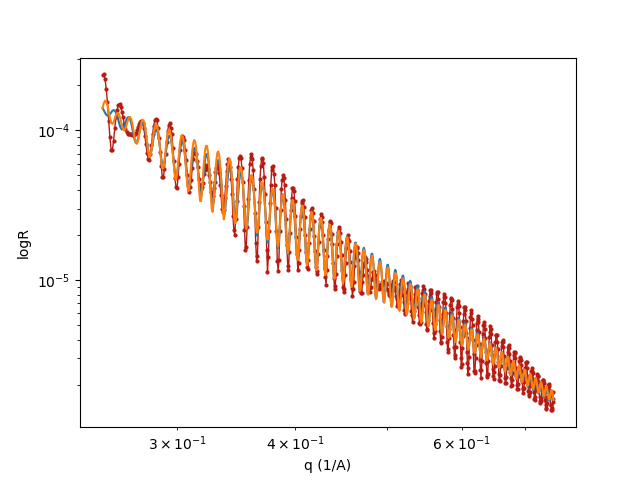

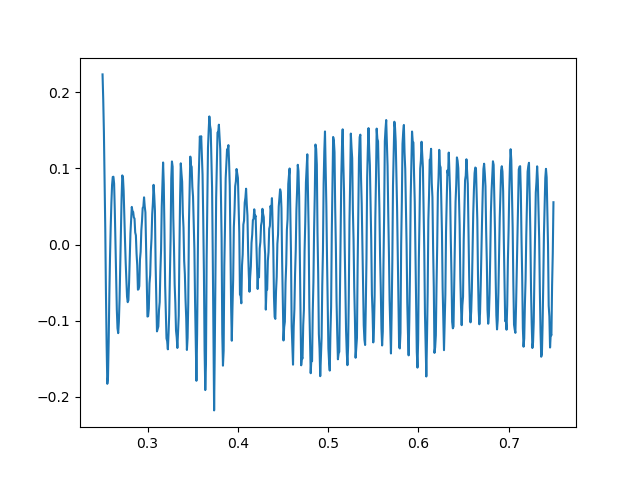

In [26]:
obj,pars2 = ana_xrr.refit(obj, pth+flist[13], qrng=[0.25, 0.75])

In [ ]:

obj,pars2 = ana_xrr.refit(obj, pth+flist[13], qrng=[0.25, 0.75])
print(obj.chisqr())

obj,pars2 = ana_xrr.refit(obj, pth+flist[13], qrng=[0.25, 1])
print(obj.chisqr())

obj,pars2 = ana_xrr.refit(obj, pth+flist[13], qrng=[0.25, 1.2])
print(obj.chisqr())


3.232932448637921: : 510it [00:43, 11.82it/s] 


6.46473182841786


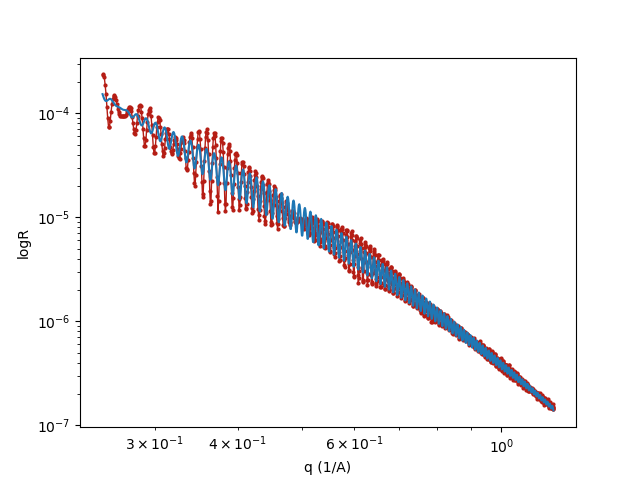

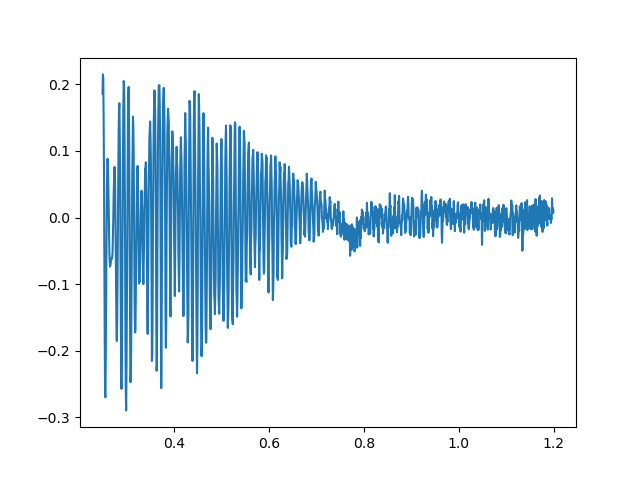

In [4]:
obj,pars2 = ana_xrr.refit(obj, pth+flist[13], qrng=[0.25, 1.2])
print(obj.chisqr())

In [6]:
obj.nll()

3.23236591420893

3.1786791255405955: : 503it [00:42, 11.82it/s]


6.3513857641419795


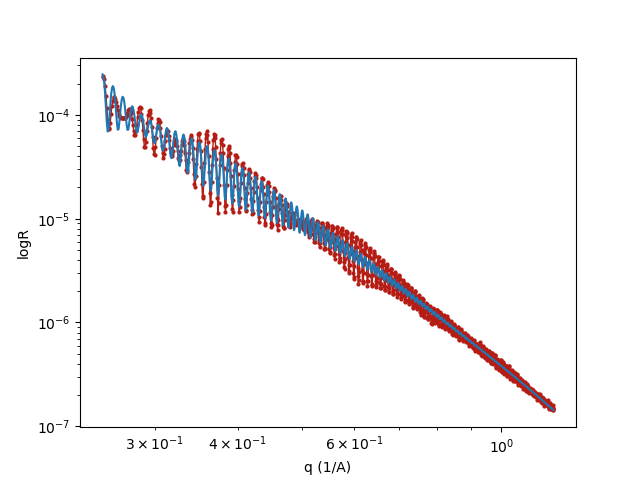

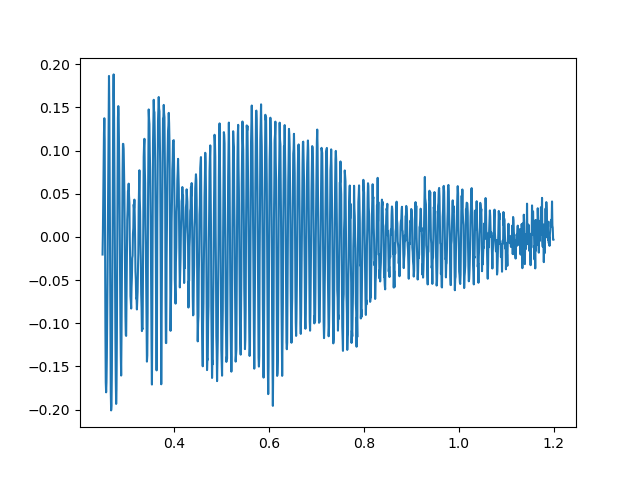

In [7]:
obj2,pars22 = ana_xrr.refit(obj, pth+flist[13], qrng=[0.25, 1.2])
print(obj2.chisqr())

In [ ]:
obj.nll

In [50]:
pp = ana_xrr.process_objective(obj)
print(pp)

obj.chisqr()

{'thk': [1.4920916919631786, 104.6886094588325, 3.2927720064081716, 642.9387631831445, 19.996611824481114, inf], 'rough': [8.898676999481376, 5.453401968085616, 2.2951816165996575, 0.8933590055509191, 5.876047806119967, 3.171640754456332], 'sld': [20.94444045213482, 23.217131733248266, 14.673304656639905, 83.57751828822391, 0.8240488778947247, 33.319], 'layers': ['AlOx_top', 'Al', 'Buff_top', 'Nb', 'AlOx_bot', 'Substrate'], 'chisq': 5.822602444789538}


5.822602444789538

In [113]:
import copy

obj2_copy = copy.deepcopy(obj2)

In [41]:
obj2.model.structure[1]

Slab(Parameter(value=26.58697569353679, name='AlOx_top - thick', vary=True, bounds=Interval(lb=0.0, ub=88.0), constraint=None), SLD([Parameter(value=3.993252718122711, name='AlOx_top - sld', vary=True, bounds=Interval(lb=0.0, ub=46.0475), constraint=None), Parameter(value=0.0, name='AlOx_top - isld', vary=False, bounds=Interval(lb=-np.inf, ub=np.inf), constraint=None)], name='AlOx_top'), Parameter(value=4.102356361657381, name='AlOx_top - rough', vary=True, bounds=Interval(lb=0.0, ub=20.0), constraint=None), name='AlOx_top', vfsolv=Parameter(value=0.0, name='AlOx_top - volfrac solvent', vary=False, bounds=Interval(lb=0.0, ub=1.0), constraint=None), interface=None)

In [37]:
print(pars2)

print(pars22)

cfg = {'al_top':{'rough':1.5, 'thk':45}, 'top_oxide':{'thk':31, 'rough':3}, 'buffer':{'thk':6, 'rough':13}}

{'thk': [31.30699411313327, 45.465387146488276, 5.849592592293251, 583.4266427656308, 0.531666247909319, inf], 'rough': [2.9349361418340734, 1.5357788517388458, 13.021583343715287, 6.774607897477445, 0.9372159806869239, 3.666398733249887], 'sld': [19.169204187766844, 28.925616860440304, 11.937386289076974, 85.81326129855698, 18.373989356433658, 33.319], 'layers': ['AlOx_top', 'Al', 'Buff_top', 'Nb', 'AlOx_bot', 'Substrate'], 'chisq': 1.5572890548729115}
{'thk': [26.58697569353679, 50.7555303781105, 9.198321154942446, 627.4901269924844, 1.188206658060332, inf], 'rough': [4.102356361657381, 5.117430145994377, 2.0280976384129623, 5.047105698342907, 0.9336808904265148, 4.755932379182708], 'sld': [3.993252718122711, 29.794016498569555, 46.75037078273957, 77.21750475418266, 9.216074216898976, 33.319], 'layers': ['AlOx_top', 'Al', 'Buff_top', 'Nb', 'AlOx_bot', 'Substrate'], 'chisq': 5.382909833545739}


________________________________________________________________________________
Objective - 13177671312
Dataset = <None>, 598 points
datapoints = 598
chi2 = 3.8701597683494002
Weighted = False
Transform = Transform('logY')
________________________________________________________________________________
________________________________________________________________________________
<Parameter:    'scale'    , value=2          , bounds=[0.9, 2.0]>
<Parameter:     'bkg'     , value=3e-08          , bounds=[1e-09, 5e-06]>
<Parameter:'dq - resolution', value=0.05  (fixed) , bounds=[0.001, 0.1]>
<Parameter:  'q_offset'   , value=0.018          , bounds=[-0.025, 0.025]>
________________________________________________________________________________
________________________________________________________________________________
<Parameter: 'Air - thick' , value=inf  (fixed) , bounds=[-inf, inf]>
________________________________________________________________________________
<Parameter:  '

0.3120383886158829: : 962it [01:46,  9.06it/s] 


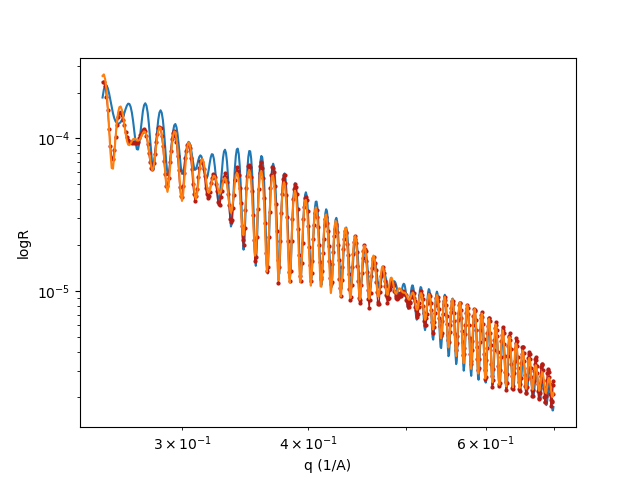

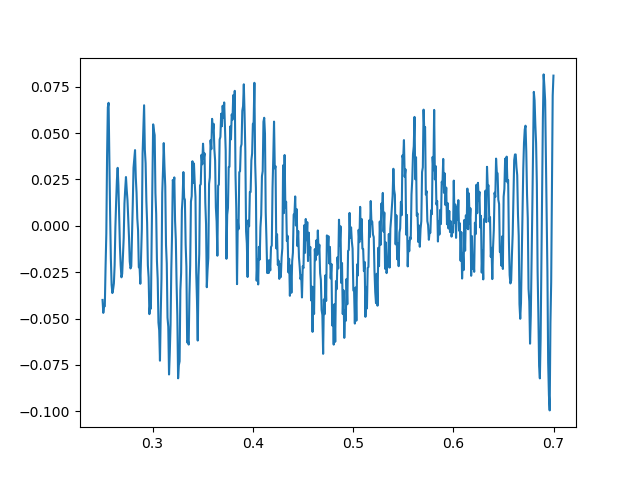

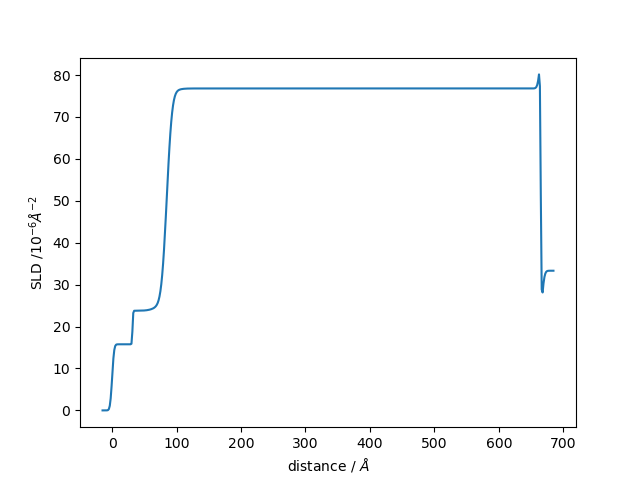

In [71]:
# Alox                Al                Buff                 Nb                 AlOx 
[19.169204187766844, 28.925616860440304, 11.937386289076974, 85.81326129855698, 18.373989356433658, 33.319]
cfg_sld = {'al':29, 'nb':85.8}
cfg_in = {'scale':2, 'bkg':3e-8,'q_offset':0.018}
cfg = {'al':{'rough':1.14, 'thk':45.5}, 'top_oxide':{'thk':31.3, 'rough':2.95}, 'buffer':{'thk':5.8, 'rough':13}, 'nb':{'thk':583, 'rough':6.8}, 'bottom_oxide':{'thk':0.5, 'rough':0.93},'substrate':{'rough':3.67,'rough_max':15}}
obj1, struct5, pars5 = ana_xrr.sim_al(pth+flist[13], level='ox/al/buff/nb/ox', qrng=[0.25,0.7],cfg_in=cfg, cfg_sld_in=cfg_sld,plot=True, SLD_rng=1.5, cfg_in2=cfg_in, no_fit=False, careful=True)


### Al/Nb

1.2031776324908132: : 350it [00:50,  6.98it/s]


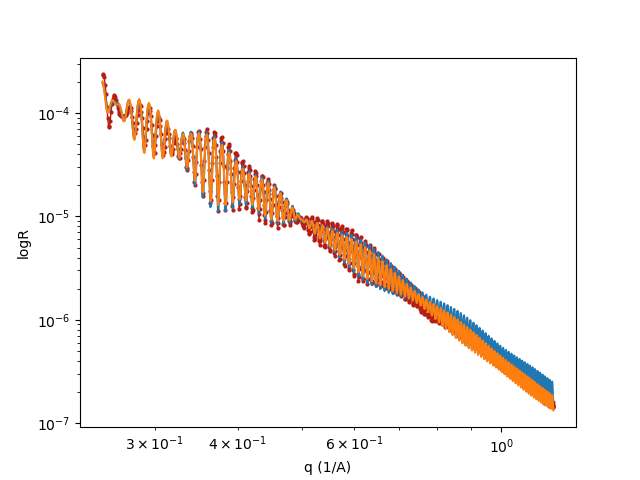

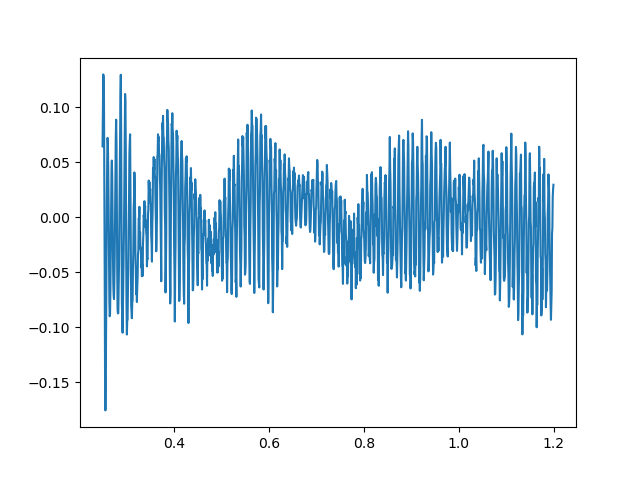

In [114]:
obj7,pars7 = ana_xrr.refit(copy.deepcopy(obj), pth+flist[13], qrng=[0.25, 1.2], reset=False, fit=True)

0.560318558741118: : 693it [01:26,  8.02it/s] 


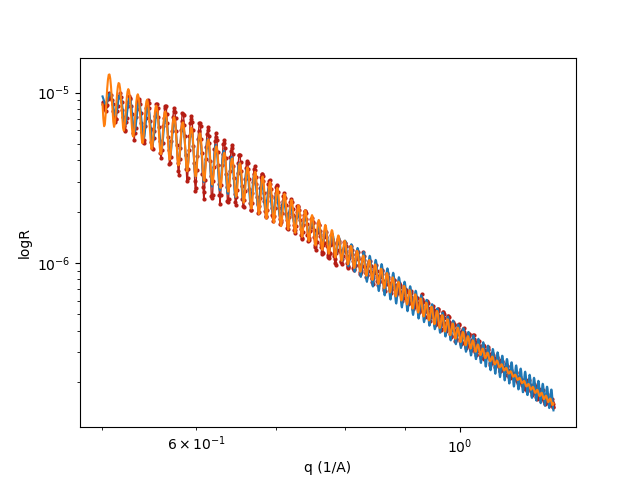

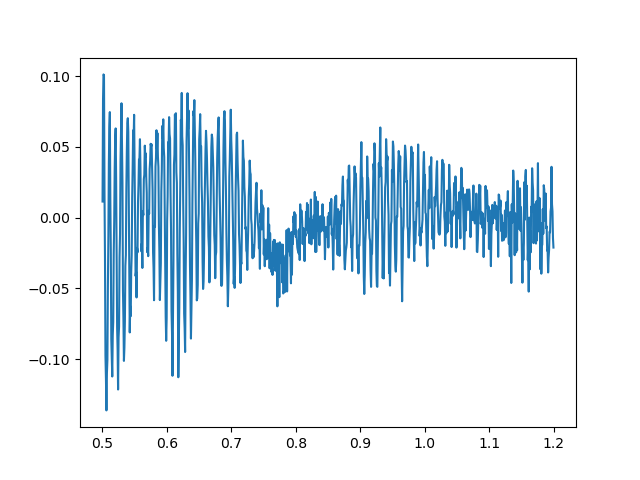

In [119]:
#obj7,pars7 = ana_xrr.refit(copy.deepcopy(obj), pth+flist[13], qrng=[0.5, 1.2], reset=False, fit=True)
#obj8,pars8 = ana_xrr.refit(copy.deepcopy(obj7), pth+flist[13], qrng=[0.5, 1.2], reset=True, fit=True)
obj8,pars8 = ana_xrr.refit(copy.deepcopy(obj7), pth+flist[13], qrng=[0.5, 1.2], reset=True, fit=True)

In [138]:
print(obj7.model.structure)

________________________________________________________________________________
Structure:                
solvent: None
reverse structure: False
contract: 0

________________________________________________________________________________
<Parameter: 'Air - thick' , value=inf  (fixed) , bounds=[inf, inf]>
________________________________________________________________________________
<Parameter:  'Air - sld'  , value=0  (fixed) , bounds=[0.0, 0.0]>
<Parameter: 'Air - rough' , value=0  (fixed) , bounds=[0.0, 0.0]>
________________________________________________________________________________
<Parameter:'AlOx_top - thick', value=24.5562 +/- 0.112, bounds=[19.77063966956077, 29.65595950434115]>
________________________________________________________________________________
<Parameter:'AlOx_top - sld', value=15.4631 +/- 35.4 , bounds=[14.645483312136918, 21.968224968205377]>
<Parameter:'AlOx_top - rough', value=2.77786 +/- 0.16 , bounds=[2.059478096092973, 3.089217144139459]>
_______

In [117]:
print(obj7)

________________________________________________________________________________
Objective - 13177671312
Dataset = <None>, 1262 points
datapoints = 1262
chi2 = 2.4063552649816264
Weighted = False
Transform = Transform('logY')
________________________________________________________________________________
________________________________________________________________________________
<Parameter:    'scale'    , value=1.05472 +/- 0.158, bounds=[0.9, 2.0]>
<Parameter:     'bkg'     , value=6.09528e-08 +/- 1.01e-08, bounds=[1e-09, 5e-06]>
<Parameter:'dq - resolution', value=0.05  (fixed) , bounds=[0.001, 0.1]>
<Parameter:  'q_offset'   , value=0.00190287 +/- 0.000579, bounds=[-0.025, 0.025]>
________________________________________________________________________________
________________________________________________________________________________
<Parameter: 'Air - thick' , value=inf  (fixed) , bounds=[inf, inf]>
_______________________________________________________________________

In [107]:
print(obj)

________________________________________________________________________________
Objective - 13177671312
Dataset = <None>, 598 points
datapoints = 598
chi2 = 0.92297005960067
Weighted = False
Transform = Transform('logY')
________________________________________________________________________________
________________________________________________________________________________
<Parameter:    'scale'    , value=0.91117 +/- 0.463, bounds=[0.9, 2.0]>
<Parameter:     'bkg'     , value=6.59774e-08 +/- 1.31e-06, bounds=[1e-09, 5e-06]>
<Parameter:'dq - resolution', value=0.05  (fixed) , bounds=[0.001, 0.1]>
<Parameter:  'q_offset'   , value=0.00207052 +/- 0.00312, bounds=[-0.025, 0.025]>
________________________________________________________________________________
________________________________________________________________________________
<Parameter: 'Air - thick' , value=inf  (fixed) , bounds=[inf, inf]>
____________________________________________________________________________

0.4625874330464086: : 438it [00:50,  8.63it/s] 


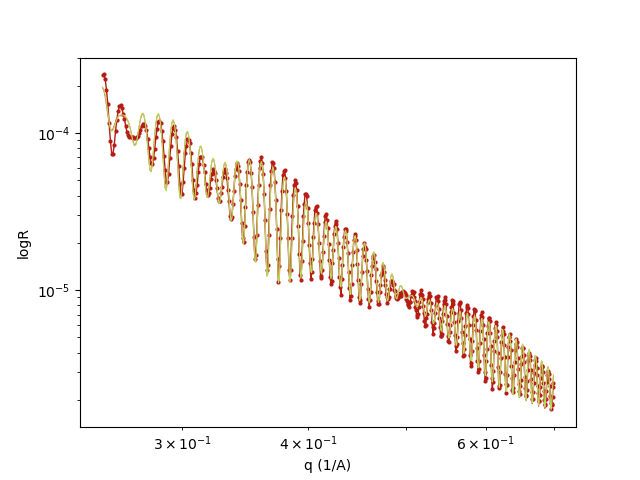

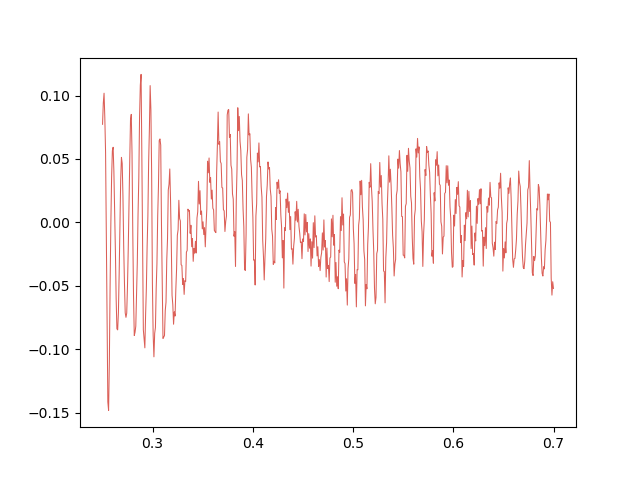

In [134]:
obj,pars2 = ana_xrr.refit(obj0, pth+flist[13], qrng=[0.25, 0.7])

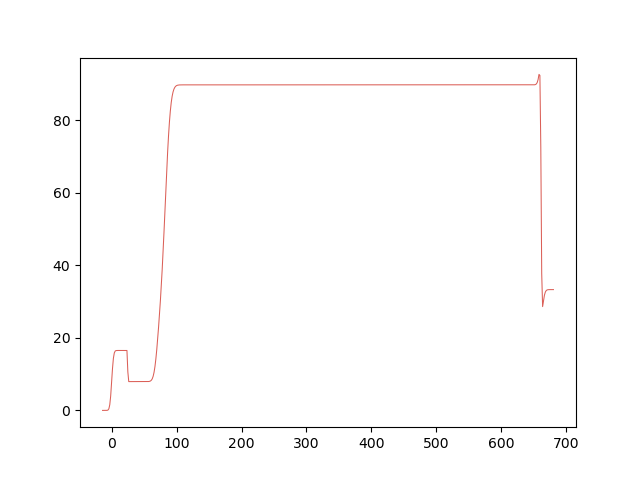

In [137]:
plt.figure()
plt.plot(*obj.model.structure.sld_profile())

In [80]:
print(obj2)

________________________________________________________________________________
Objective - 13177671312
Dataset = <None>, 664 points
datapoints = 664
chi2 = 1.3252505129750838
Weighted = False
Transform = Transform('logY')
________________________________________________________________________________
________________________________________________________________________________
<Parameter:    'scale'    , value=0.904824 +/- 0.391, bounds=[0.9, 2.0]>
<Parameter:     'bkg'     , value=1e-09 +/- 1.41e-06, bounds=[1e-09, 5e-06]>
<Parameter:'dq - resolution', value=0.05  (fixed) , bounds=[0.001, 0.1]>
<Parameter:  'q_offset'   , value=0.00232554 +/- 0.00283, bounds=[-0.025, 0.025]>
________________________________________________________________________________
________________________________________________________________________________
<Parameter: 'Air - thick' , value=inf  (fixed) , bounds=[inf, inf]>
_______________________________________________________________________________

In [78]:
print(obj2)

________________________________________________________________________________
Objective - 13177671312
Dataset = <None>, 664 points
datapoints = 664
chi2 = 1.7582310155798764
Weighted = False
Transform = Transform('logY')
________________________________________________________________________________
________________________________________________________________________________
<Parameter:    'scale'    , value=0.904738 +/- 0.445, bounds=[0.9, 2.0]>
<Parameter:     'bkg'     , value=1e-09 +/- 1.55e-06, bounds=[1e-09, 5e-06]>
<Parameter:'dq - resolution', value=0.05  (fixed) , bounds=[0.001, 0.1]>
<Parameter:  'q_offset'   , value=0.0123359 +/- 0.00331, bounds=[-0.025, 0.025]>
________________________________________________________________________________
________________________________________________________________________________
<Parameter: 'Air - thick' , value=inf  (fixed) , bounds=[-inf, inf]>
_______________________________________________________________________________

In [76]:
print(obj)

________________________________________________________________________________
Objective - 13177671312
Dataset = <None>, 598 points
datapoints = 598
chi2 = 0.38411105138536905
Weighted = False
Transform = Transform('logY')
________________________________________________________________________________
________________________________________________________________________________
<Parameter:    'scale'    , value=1.26474 +/- 0.675, bounds=[0.9, 2.0]>
<Parameter:     'bkg'     , value=5.27331e-08 +/- 1.09e-06, bounds=[1e-09, 5e-06]>
<Parameter:'dq - resolution', value=0.05  (fixed) , bounds=[0.001, 0.1]>
<Parameter:  'q_offset'   , value=0.016191 +/- 0.00293, bounds=[-0.025, 0.025]>
________________________________________________________________________________
________________________________________________________________________________
<Parameter: 'Air - thick' , value=inf  (fixed) , bounds=[-inf, inf]>
__________________________________________________________________________

In [73]:
print(obj0)

print(pars4)

________________________________________________________________________________
Objective - 13177671312
Dataset = <None>, 598 points
datapoints = 598
chi2 = 0.6234767230540922
Weighted = False
Transform = Transform('logY')
________________________________________________________________________________
________________________________________________________________________________
<Parameter:    'scale'    , value=1.29499 +/- 0.675, bounds=[0.9, 2.0]>
<Parameter:     'bkg'     , value=7.72388e-08 +/- 1.09e-06, bounds=[1e-09, 5e-06]>
<Parameter:'dq - resolution', value=0.05  (fixed) , bounds=[0.001, 0.1]>
<Parameter:  'q_offset'   , value=-0.000881232 +/- 0.00293, bounds=[-0.025, 0.025]>
________________________________________________________________________________
________________________________________________________________________________
<Parameter: 'Air - thick' , value=inf  (fixed) , bounds=[-inf, inf]>
_______________________________________________________________________

In [74]:
pars4

{'thk': [31.646516213727402,
  49.45039969763005,
  3.7129843221986767,
  580.2287537936887,
  0.6244109365113352,
  inf],
 'rough': [2.4661715583585515,
  0.7743616673960334,
  14.0103453434008,
  6.449244175495409,
  0.9498256755513259,
  3.5242942483396806],
 'sld': [15.769375732803299,
  23.769455569776582,
  28.914182281508847,
  76.79759614905672,
  13.020662646104613,
  33.319],
 'layers': ['AlOx_top', 'Al', 'Buff_top', 'Nb', 'AlOx_bot', 'Substrate'],
 'chisq': 0.6234767230540922}

1.6923497790294748: : 502it [00:33, 14.93it/s]


3.3757709841442702


3.9146979999050164: : 418it [00:28, 14.93it/s]


7.813536086485088


6.329704734906038: : 297it [00:18, 15.74it/s]


12.626537952877921


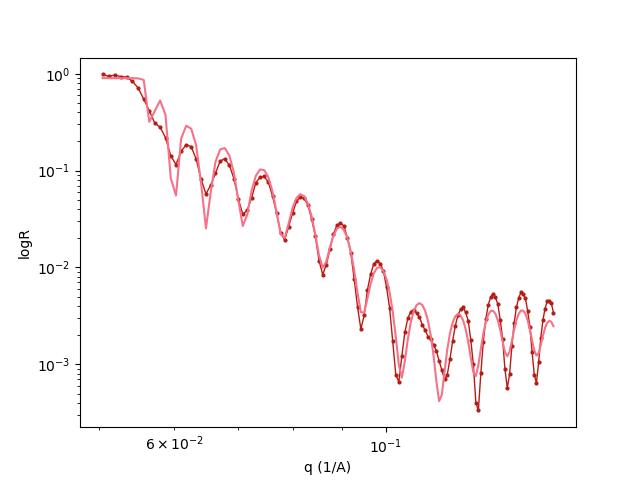

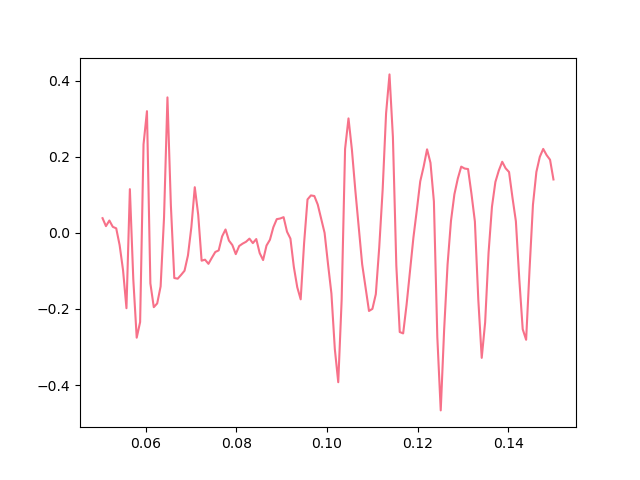

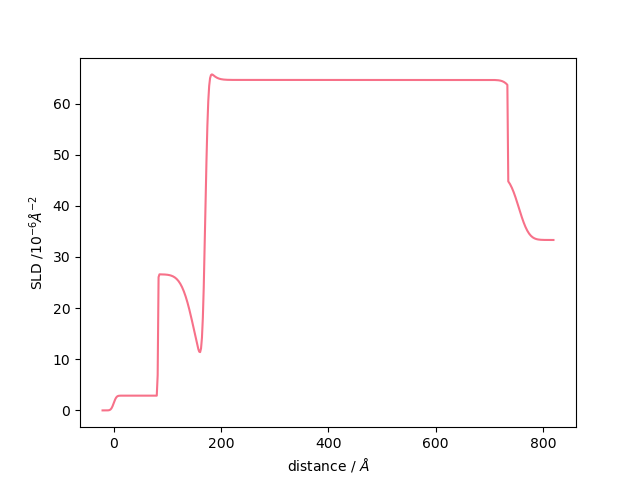

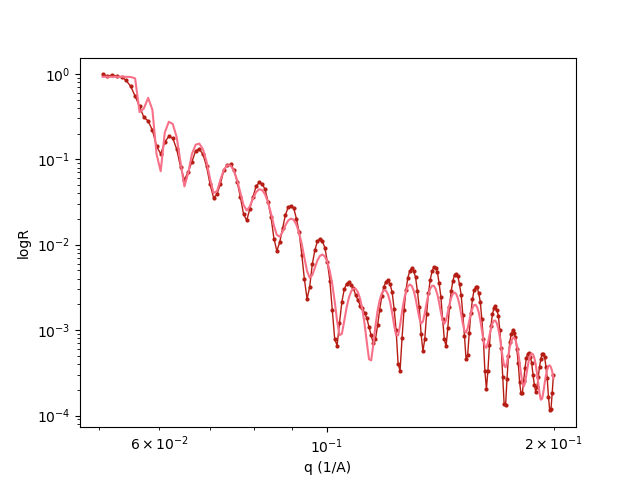

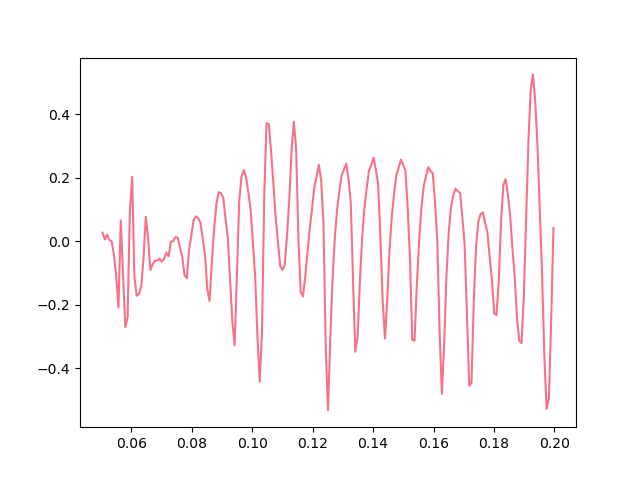

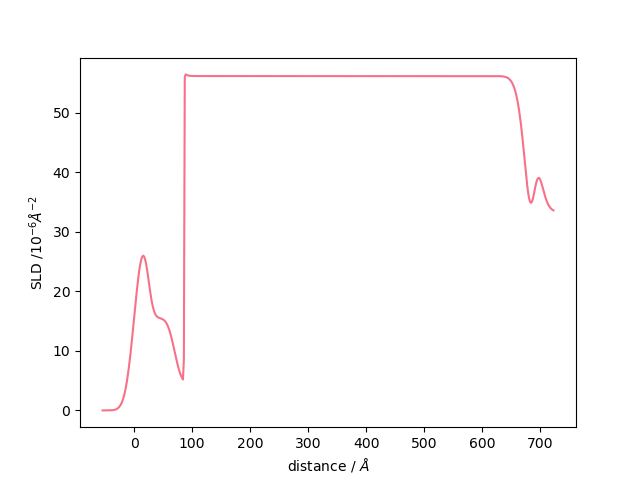

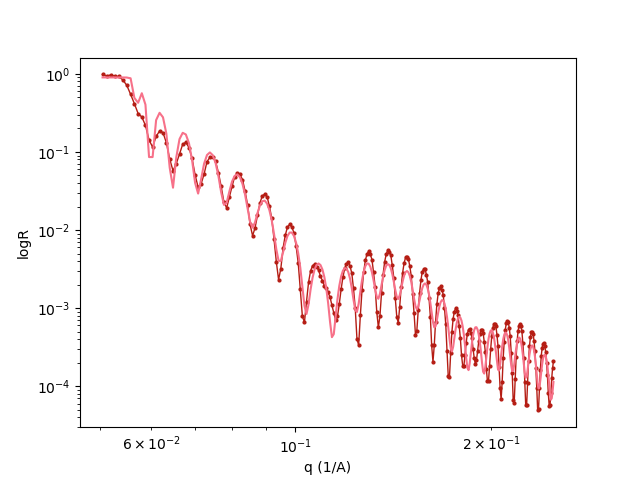

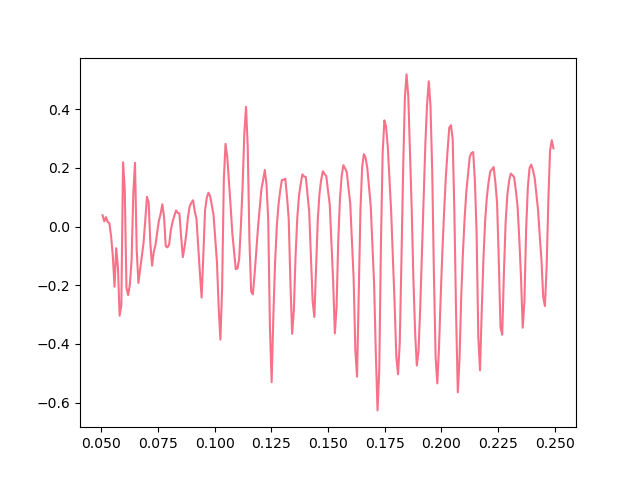

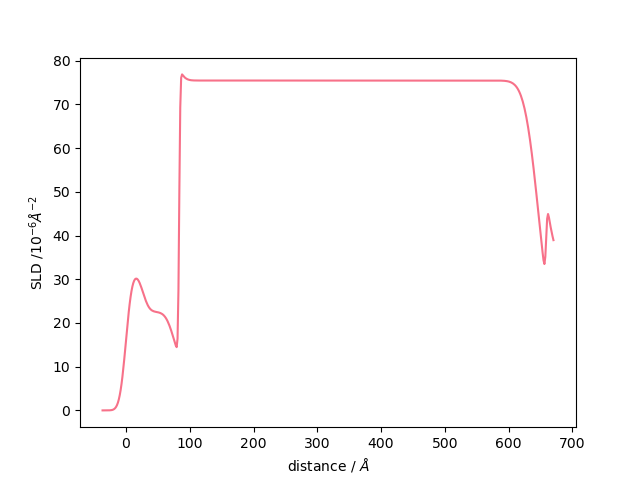

In [28]:
obj, struct4, pars4 = ana_xrr.sim_al(pth+flist[13], level='ox/al/buff/nb/ox', qrng=[0.05,0.15],cfg_in={'al':{'rough':1,'thk':80}, 'nb':{'rough':6,'thk':570}}, plot=True, SLD_rng=1.5)
print(obj.chisqr())
obj, struct4, pars4 = ana_xrr.sim_al(pth+flist[13], level='ox/al/buff/nb/ox', qrng=[0.05,0.2],cfg_in={'al':{'rough':1,'thk':80}, 'nb':{'rough':6,'thk':570}}, plot=True, SLD_rng=1.5)
print(obj.chisqr())
obj, struct4, pars4 = ana_xrr.sim_al(pth+flist[13], level='ox/al/buff/nb/ox', qrng=[0.05,0.25],cfg_in={'al':{'rough':1,'thk':80}, 'nb':{'rough':6,'thk':570}}, plot=True, SLD_rng=1.5)
print(obj.chisqr())

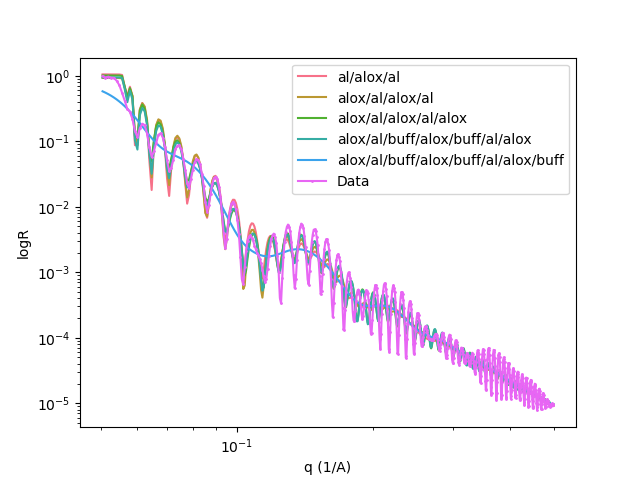

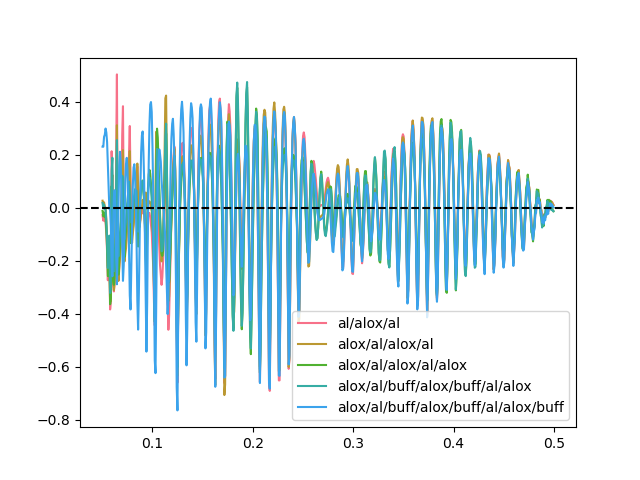

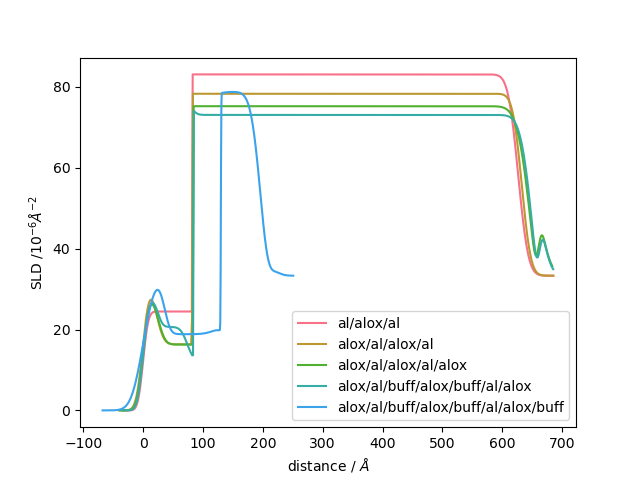

In [15]:
sns.set_palette('husl',6)
ana_xrr.plot_obj([obj1, obj2,obj3,obj4,obj5],['al/alox/al','alox/al/alox/al', 'alox/al/alox/al/alox','alox/al/buff/alox/buff/al/alox','alox/al/buff/alox/buff/al/alox/buff'], [struct1,struct2,struct3,struct4,struct5])

In [103]:
thk =[]
rough =[]
sld = []
lays = []
#obj2.parameters[1][1][2].value
for i in range(1,len(obj2.parameters[1])):
    lays.append(obj2.parameters[1][i].name)
    rough.append(obj2.parameters[1][i][2].value)
    thk.append(obj2.parameters[1][i][0].value)
    sld.append(obj2.parameters[1][i][1][0].value)

print(lays)
print(rough)
print(sld)
print(thk)

['AlOx_top', 'Al', 'Buff_top', 'AlOx_JJ', 'Buff_top', 'Al', 'AlOx_bot', 'Substrate']
[19.945185558412913, 9.985603833477906, 19.728034941020432, 0.04598735669629092, 2.0612326347148766, 0.3774583636147566, 10.843833523256064, 9.654149856070868]
[13.806133988225648, 21.29396881053823, 30.802240225510197, 5.4763540419719305, 30.802240225510197, 21.29396881053823, 5.08310749200615, 8.419]
[66.61109780773988, 465.48986406932914, 19.953225568877606, 9.223276021154739, 1.220753130859696, 469.42287431168523, 19.675303991529294, inf]
